In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import model_based_agent as mba 
import worm_env as we 
import fake_worm as fw
import ensemble_mod_env as eme

from improc import *
import utils as ut
import tab_agents as tab
from datetime import datetime 

In [3]:
folder = './Data/OnlyDet01-02-13-11/'
pres = []
trials = []
post = []
for i in range(15):
    with open(folder+'det'+str(i)+'.pkl','rb') as f:
        pres.append(pickle.load(f))

In [4]:
pres[0].keys()

dict_keys(['loc', 't', 'endpts', 'obs', 'reward', 'target', 'action'])

In [5]:
i=0
pres_n = {}
for k in pres[i].keys():
    pres_n[k] = np.array(pres[i][k]).flatten()
for i in np.arange(14)+1:
    for k in pres[i].keys():
        pres_n[k] = np.append(pres_n[k],pres[i][k])
pres_n['loc'] = pres_n['loc'].reshape(-1,2)
pres_n['obs'] = pres_n['obs'].reshape(-1,2)*180

(array([1555.,  618.,  339.,  685., 1432.,  759., 1354.,  686.,  237.,
        2013.]),
 array([-180., -147., -114.,  -81.,  -48.,  -15.,   18.,   51.,   84.,
         117.,  150.]),
 <BarContainer object of 10 artists>)

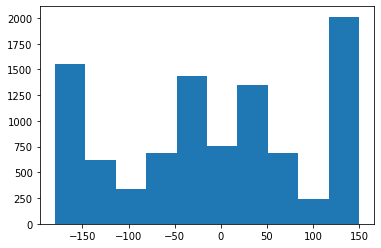

In [6]:
plt.hist(pres_n['obs'][:,1])

In [11]:
pres[0]['target'][25]

90

In [8]:
pres[0]['endpts'][25]

array([[1059, 1074],
       [1189, 1178]])

In [10]:
pres[0]['obs'][25]*180

array([150., 120.])

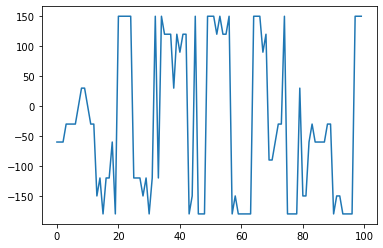

In [67]:
plt.plot(pres_n['obs'][:,1][9000:9100])

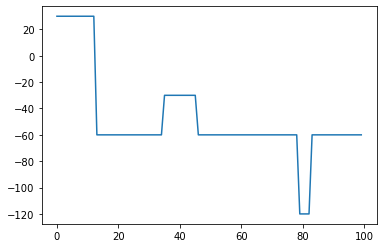

In [69]:
plt.plot(pres_n['obs'][:,0][9000:9100])

In [65]:
pres_n['target'][9600]

270

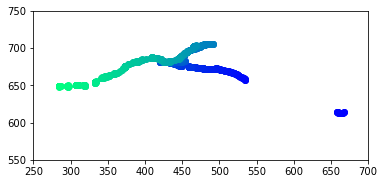

In [63]:
locs = pres_n['loc'][9000:]
NPOINTS = len(locs)
start = 0
fig,ax = plt.subplots(1)
plt.ylim((550,750))
plt.xlim((250,700))

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in np.arange(start,start+NPOINTS-1):
    img = ax.scatter(locs[i,0],locs[i,1])
    ax.set_aspect('equal','box')

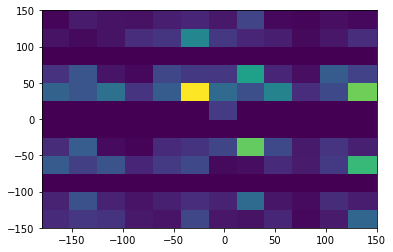

In [38]:
plt.hist2d(pres_n['obs'][:,1],pres_n['obs'][:,0],bins=12);

In [42]:
def get_model_from_files(files,lp_frac):
    dh = mba.DataHandler()
    dh.load_df(files[0]+'alls.pkl')
    for f in files[1:]:
        dh.add_df_to_df([f+'alls.pkl'])
#     mset = eme.ModelSet(1,frac=1,lp_frac=lp_frac)
#     mset.make_models(dh,sm_pars={'lambda':.1,'iters':10})
    return dh


files = ['./Data/HTFix19-01-18-47/',
           './Data/HTFix19-01-20-29/',
           './Data/HTFix19-01-21-18/',
           './Data/HTFix20-01-09-04/',
           './Data/HTFix20-01-09-42/',
           './Data/HTFix20-01-10-41/',
          ]
files = ['../01_13_reals/'+f[2:] for f in files]

dh = get_model_from_files(files,.4)

In [43]:
dh.df

,t,obs_b,angs,prev_actions,reward,loc,target,obs_h,next_obs_b,next_obs_h
0,0.984,-30,"[90, 270]",3,6.421441,"[1007.8554216867469, 1002.0602409638554]",90,30.0,-30.0,30.0
1,1.172,-30,"[90, 270]",2,6.134315,"[1008.2528735632184, 1000.9195402298851]",90,30.0,-30.0,30.0
2,1.375,-30,"[90, 270]",1,6.425035,"[1008.3827160493827, 1000.469135802469]",90,30.0,-30.0,30.0
3,1.562,-30,"[90, 240]",0,6.587415,"[1008.6585365853659, 999.7317073170732]",90,30.0,-30.0,30.0
4,1.765,-30,"[90, 240]",0,6.356707,"[1008.6470588235295, 999.3764705882354]",90,30.0,-30.0,60.0
...,...,...,...,...,...,...,...,...,...,...
47319,235.000,30,"[240, 120]",0,0.400000,"[101.6, 845.2]",180,30.0,120.0,-90.0
47320,297.797,120,"[210, 90]",2,0.666667,"[89.0, 888.0]",180,-90.0,120.0,-30.0
47321,297.984,120,"[270, 90]",3,0.666667,"[88.57142857142857, 886.2857142857143]",180,-30.0,120.0,-30.0
47322,298.156,120,"[270, 90]",2,0.071429,"[88.42857142857143, 887.2857142857143]",180,-30.0,120.0,-30.0


(array([  168.,  1124.,  1994.,  5988., 12091.,  5806.,  9830.,  7071.,
         1805.,  1447.]),
 array([-180., -147., -114.,  -81.,  -48.,  -15.,   18.,   51.,   84.,
         117.,  150.]),
 <BarContainer object of 10 artists>)

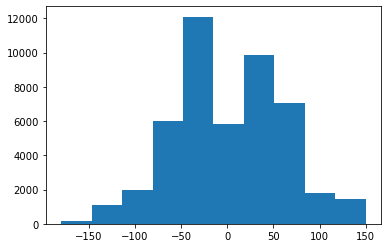

In [46]:
plt.hist(dh.df['obs_h'].to_numpy())

In [53]:
import cv2
from improc import *
import utils as ut

In [48]:
img = cv2.imread('worm_crop2_1.jpg',0)

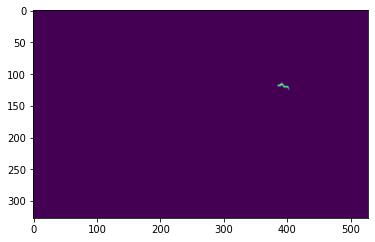

In [49]:
plt.imshow(img)

In [41]:
templates,bodies = load_templates()

In [56]:
worms = find_worms(img,templates,bodies)
worm = worms[0]

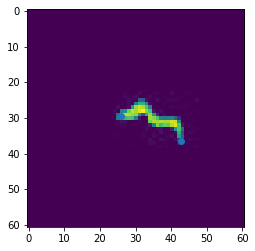

In [51]:
plt.imshow(worms[0]['img'])
plt.scatter(worm['endpts'][0]-worm['loc'][0]+35,worm['endpts'][1]-worm['loc'][1]+30)

In [52]:
worms[0]

{'loc': array([394.12857143, 118.7       ]),
 'img': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'scores': array([ 64917, 196875]),
 'angs': array([180, 270]),
 'endpts': array([[385, 402],
        [118, 125]]),
 'body': 150}

In [68]:
direction=180
target = 0
worms = find_worms(img,templates,bodies)
worm = worms[0]
body_dir = relative_angle(worms[0]['body'], target)
if abs(relative_angle(body_dir,direction-target)) > 90:
    body_dir = ut.wrap_correct(body_dir+180)
    head_body = relative_angle(worms[0]['angs'][1], worms[0]['body']+180)
    worms[0]['endpts'] = np.fliplr(worms[0]['endpts'])
    print('here')
    
else:
    head_body = relative_angle(worms[0]['angs'][0], worms[0]['body'])

obs = np.array([body_dir,head_body])/180.

In [69]:
obs*180

array([150.,  30.])

# There was something stupid with the image processing I did. 
If fixed, head angle dist should look Gaussian.

In [2]:
cam,task = init_instruments()
for i in range(2):
    worm_ep_len = 120

    traj = {}
    worm = we.ProcessedWorm(0,ep_len=worm_ep_len)
   
    worm.reset(cam,task)
    action=0
    done=False

    while not done:
        obs,rew,done,info = worm.step(action,cam,task)
        if np.sign(obs[0]*obs[1])==-1:
            action=1
        else:
            action=0
        ut.add_to_traj(traj,info)
    print(np.mean(traj['reward']))

#     with open(f'./Data/Learned01-02-16-30/PostManual{i}.pkl','wb') as f:
#         pickle.dump(traj,f)
cam.exit()
task.write(0)
task.close()

Done resetting	
0.6965900044228218
Done resetting	
0.315820858862219


In [3]:
traj_n = {}
for k in traj.keys():
    traj_n[k] = np.array(traj[k]).flatten()
for i in np.arange(14)+1:
    for k in traj.keys():
        traj_n[k] = np.append(traj_n[k],traj[k])
traj_n['loc'] = traj_n['loc'].reshape(-1,2)
traj_n['obs'] = traj_n['obs'].reshape(-1,2)*180

In [4]:
traj_n['obs']

array([[-120.,   30.],
       [-120.,   60.],
       [-120.,   30.],
       ...,
       [  30.,  -30.],
       [  30.,  -30.],
       [  30.,  -30.]])

(array([ 390.,  525.,    0., 2190., 3930.,    0.,  825.,  450.,    0.,
        1665.]),
 array([-150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60.,   90.,
         120.,  150.]),
 <BarContainer object of 10 artists>)

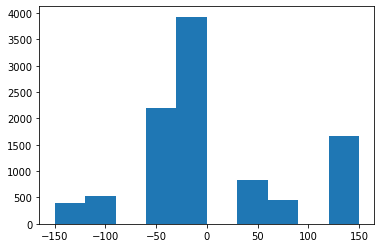

In [6]:
plt.hist(traj_n['obs'][:,0])

# Model checking for reward_ahead

In [8]:
def plot_mods(models,vmin=None,vmax=None):
    fig,ax = plt.subplots(len(models),7)
    fig.set_size_inches((15,2*len(models)))
    for m,mod in enumerate(models):
        for i,(key,item) in enumerate(mod.items()):
            if i<4:
                img = ax[m,i].imshow(item[:,:,0],vmin=-180,vmax=180)
            else:
                img = ax[m,i].imshow(item[:,:,0],vmin=vmin,vmax=vmax)
            cbar = fig.colorbar(img,ax=ax[m,i])
            ax[m,i].axis('off')
            #cbar.set_ticks([])
            if m==0:
                ax[m,i].set_title(f'{len(models)} models: {key}')
        ax[m,6].imshow(np.sign(mod['reward_on'][:,:,0]-mod['reward_off'][:,:,0]),vmin=-1,vmax=1)

In [13]:
msets = []
ras = np.arange(1,33,2)
for i in ras:
    mname = f'model_ra_{i}.pkl'
    with open(mname,'rb') as f:
        msets.append(pickle.load(f).models[0])

msq = np.zeros(len(msets))
for i,mod in enumerate(msets):
    msq[i] = np.sum(np.square(((mod['reward_on'][:,:,0] - mod['reward_off'][:,:,0]) / ras[i]).flatten()))

Text(0, 0.5, 'Mean square difference between light on/off')

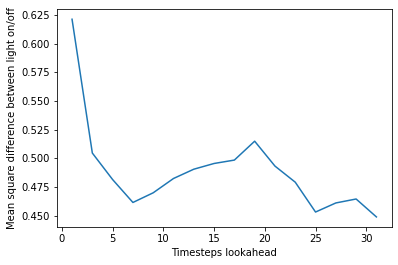

In [17]:
plt.plot(ras,msq)
plt.xlabel('Timesteps lookahead')
plt.ylabel('Mean square difference between light on/off') # Normalized by step number

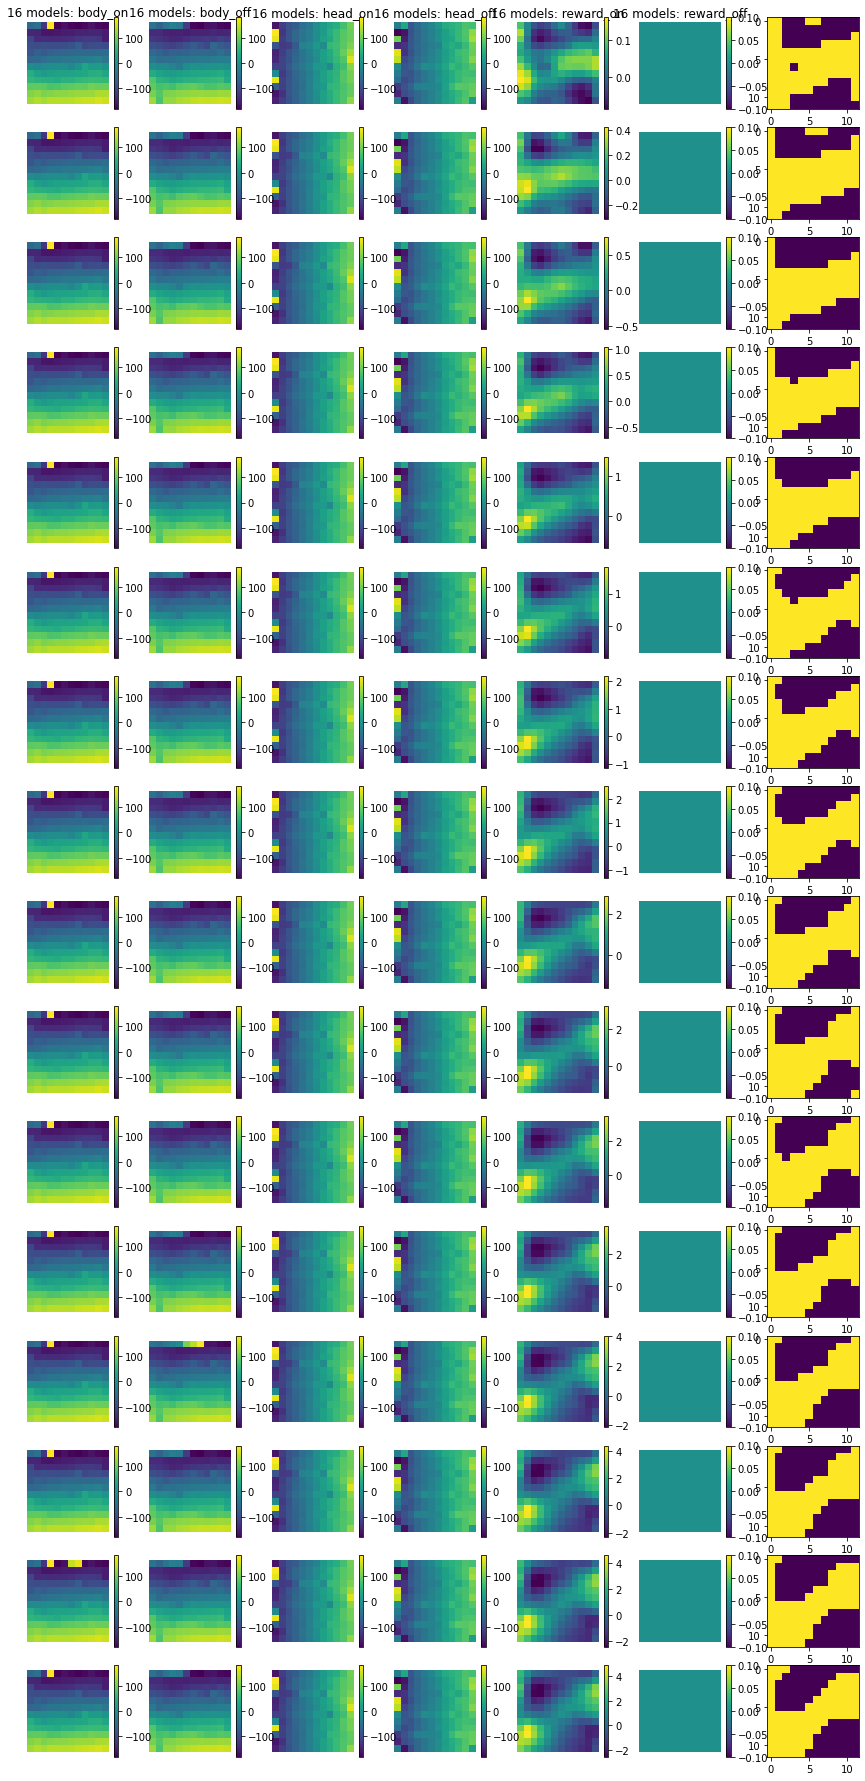

In [15]:
plot_mods(msets)